### Vuokrayksiöiden mediaanihintojen hintakehitys suurissa kaupungeissa 2020-luvulla (€/$m^2$)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

In [2]:
# Luetaan tiedostot dataframeihin
df = pd.read_csv('AsuntojenHinnat.csv', encoding='ISO-8859-1', sep=';', decimal='.')
df2 = pd.read_csv('Inflaatio.csv', encoding='ISO-8859-1', sep=';', decimal=',')

#### Lähtötilanne 2020-vuoden ensimmäiseltä kvartaalilta 

In [3]:
df[df['Vuosineljännes'] == '2020Q1'].sort_values(by='Mediaani')


,Vuosineljännes,Alue,Huoneluku,Mediaani
4,2020Q1,Pori,Yksiöt,13.76
7,2020Q1,Lahti,Yksiöt,15.79
10,2020Q1,Oulu,Yksiöt,16.06
5,2020Q1,Hämeenlinna,Yksiöt,16.89
3,2020Q1,Turku,Yksiöt,17.27
9,2020Q1,Jyväskylä,Yksiöt,17.58
8,2020Q1,Kuopio,Yksiöt,17.68
6,2020Q1,Tampere,Yksiöt,18.27
2,2020Q1,Vantaa,Yksiöt,22.19
1,2020Q1,Espoo-Kauniainen,Yksiöt,22.73


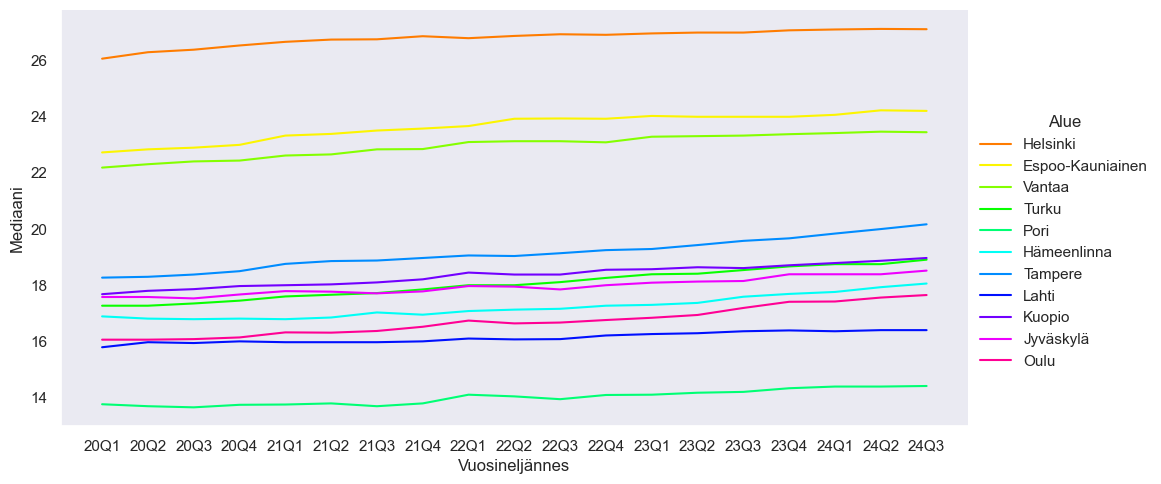

In [4]:
palette = sns.color_palette("hsv", 11)

def transform_quarter(x):
    return x[2:]

df['Vuosineljännes'] = df['Vuosineljännes'].apply(transform_quarter)

sns.relplot(
    data=df,
    x="Vuosineljännes", y="Mediaani",
    hue="Alue", 
    kind="line", palette=palette,
    aspect=2
)

#### Kaupunkien neliöhintojen mediaanin kokonaiskasvu 2020-luvun aikana

In [5]:
def calculate_total_growth(city_data):
    first_value = city_data['Mediaani'].iloc[0]
    last_value = city_data['Mediaani'].iloc[-1]
    return ((last_value - first_value) / first_value) * 100

growth_rates = []
for city in df['Alue'].unique():
    city_data = df[df['Alue'] == city].sort_values('Vuosineljännes')
    growth_rate = calculate_total_growth(city_data)
    growth_rates.append({'City': city, 'Total Growth %': round(growth_rate, 2),
                         'Start Value': city_data['Mediaani'].iloc[0],
                         'End Value': city_data['Mediaani'].iloc[-1]
    })

results_df = pd.DataFrame(growth_rates).sort_values('Total Growth %', ascending=False)
print(results_df.to_string(index=False))

            City  Total Growth %  Start Value  End Value
         Tampere           10.40        18.27      20.17
            Oulu            9.90        16.06      17.65
           Turku            9.50        17.27      18.91
          Kuopio            7.30        17.68      18.97
     Hämeenlinna            6.93        16.89      18.06
Espoo-Kauniainen            6.51        22.73      24.21
          Vantaa            5.68        22.19      23.45
       Jyväskylä            5.35        17.58      18.52
            Pori            4.72        13.76      14.41
        Helsinki            4.03        26.07      27.12
           Lahti            3.86        15.79      16.40


#### Inflaation vuosittainen- ja kokonaiskasvu 1/2020 - 1/2024

In [6]:
df2['Pisteluku'] = pd.to_numeric(df2['Pisteluku'])
first_value = df2['Pisteluku'].iloc[0]
last_value = df2['Pisteluku'].iloc[-1]

total_inflation = ((last_value - first_value) / first_value) * 100

df2['Year_over_Year'] = df2['Pisteluku'].pct_change() * 100
print("Yearly changes:")
for i in range(1, len(df2)):
    print(f"{df2['Kuukausi'].iloc[i]}: {df2['Year_over_Year'].iloc[i]:.2f}%")
    
print(f"\nTotal inflation from {df2['Kuukausi'].iloc[0]} to {df2['Kuukausi'].iloc[-1]}: {total_inflation:.2f}%")

Yearly changes:
2021M01: 0.88%
2022M01: 4.37%
2023M01: 8.45%
2024M01: 3.27%

Total inflation from 2020M01 to 2024M01: 17.93%
